#**PROJECT**
##STATISTICAL AND MATHEMATICAL METHODS FOR DATA SCIENCE

###**<span style='text-decoration:underline;'>OWNED BY</span>**
<br>

###**Name: M. Fouzan Asif**

## **Dataset Description**

The dataset comprises transactional information related to customer orders and purchase history, encompassing various attributes providing comprehensive insights into customer behavior, order details, and product-related information.

Customer ID: An alphanumeric identifier uniquely assigned to each customer, facilitating individual customer tracking without exposing personal details.

Customer Name: The name of the customer who placed the order, providing personal identification without revealing sensitive information.

Email: The email address associated with the customer's account, serving as a contact point for communication and order-related notifications.

Order Date: Date and time when the order was placed, offering temporal information for order analysis and trend identification.

Ordered Items: A structured list of items purchased within each order, typically comprising tuples denoting the product name and type. This field provides detailed insights into the specific products included in each transaction.

Item Type: An additional column providing information about the type or category of items purchased, aiding in the categorization and analysis of products based on their characteristics or classifications.

Total Bill: The cumulative amount billed for each order, encompassing the total cost of all items purchased, along with any applicable taxes or additional charges.

Actual Cost: The actual cost incurred by the business for fulfilling the order, offering insights into the direct expenses associated with the transaction.

Tax: The amount of tax applied to each order, providing visibility into the tax component associated with the total bill.

Net Profit: The net profit generated from each order after deducting the actual cost and taxes from the total billed amount. This field presents the profitability of individual transactions.

Mode of Shopping: The method utilized by customers to make their purchases, encompassing various options such as in-store shopping, home delivery, BOPIS (Buy Online, Pick Up In-Store), etc.

Coupon Code: An alphanumeric code used by customers to avail discounts or special offers, facilitating promotional activities and tracking the effectiveness of marketing campaigns.

Product Prices: A record of individual prices for each product included in an order, aiding in granular-level pricing analysis and understanding the price distribution of purchased items.

Product Ratings: A collection of ratings provided by customers for the purchased products, enabling assessment of customer satisfaction and product performance.

The dataset serves as a comprehensive repository of transactional details, offering valuable insights into customer preferences, buying behavior, product performance, and financial aspects of each order. Analyzing this dataset can unveil trends, patterns, and opportunities to enhance customer experience, optimize pricing strategies, and improve business profitability.



## **CODE AND ANSWERING QUESTIONS**

## Library Imports

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import poisson
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

## Helper Functions

In [2]:
def transform(df):
  df.dropna(inplace=True)
  df['Ordered Items'] = df['Ordered Items'].apply(lambda x: ast.literal_eval(x))
  df['Product Prices'] = df['Product Prices'].apply(lambda x: ast.literal_eval(x))
  df['Item Type'] = df['Item Type'].apply(lambda x: ast.literal_eval(x))
  df['Order Date'] = pd.to_datetime(df['Order Date'])
  product_rating = []
  random.seed()
  for all in df['Item Type']:
    product_rating.append([round(random.uniform(2, 5), 1) for _ in all])
  df['Product Rating'] = product_rating
  df = df.sort_values('Order Date')
  df['Cumulative Net Profit'] = df['Net Profit'].cumsum()

  def generate_random_percentage():
    return random.uniform(0.4, 0.8)

  df['Actual Cost'] = df['Product Prices'].apply(lambda prices: sum(prices) * generate_random_percentage())
  df['Tax'] = df['Product Prices'].apply(lambda prices: sum(prices) * 0.13)

  df['Total Bill'] = df['Product Prices'].apply(lambda prices: sum(prices) + sum(prices) * 0.13)
  df['Net Profit'] = df['Total Bill'] - df['Actual Cost']

  df = df[df['Ordered Items'].apply(lambda x: isinstance(x, list))]

  return df

def load_dataset():
  df = pd.read_csv("Sales Data.csv")
  df = transform(df)
  return df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Dataset Operations

In [3]:
df = load_dataset()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()
df.keys()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Customer ID', 'Customer Name', 'Email', 'Order Date', 'Ordered Items',
       'Item Type', 'Total Bill', 'Actual Cost', 'Tax', 'Net Profit',
       'Mode of Shopping', 'Coupon Code', 'Product Prices', 'Product Rating',
       'Cumulative Net Profit'],
      dtype='object')

In [ ]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 285776 entries, 56229 to 152788
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            285776 non-null  int64         
 1   Customer Name          285776 non-null  object        
 2   Email                  285776 non-null  object        
 3   Order Date             285776 non-null  datetime64[ns]
 4   Ordered Items          285776 non-null  object        
 5   Item Type              285776 non-null  object        
 6   Total Bill             285776 non-null  float64       
 7   Actual Cost            285776 non-null  float64       
 8   Tax                    285776 non-null  float64       
 9   Net Profit             285776 non-null  float64       
 10  Mode of Shopping       285776 non-null  object        
 11  Coupon Code            285776 non-null  object        
 12  Product Prices         285776 non-null  

## **Data Visualizations**

### **Net Profit Earned Per Month**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


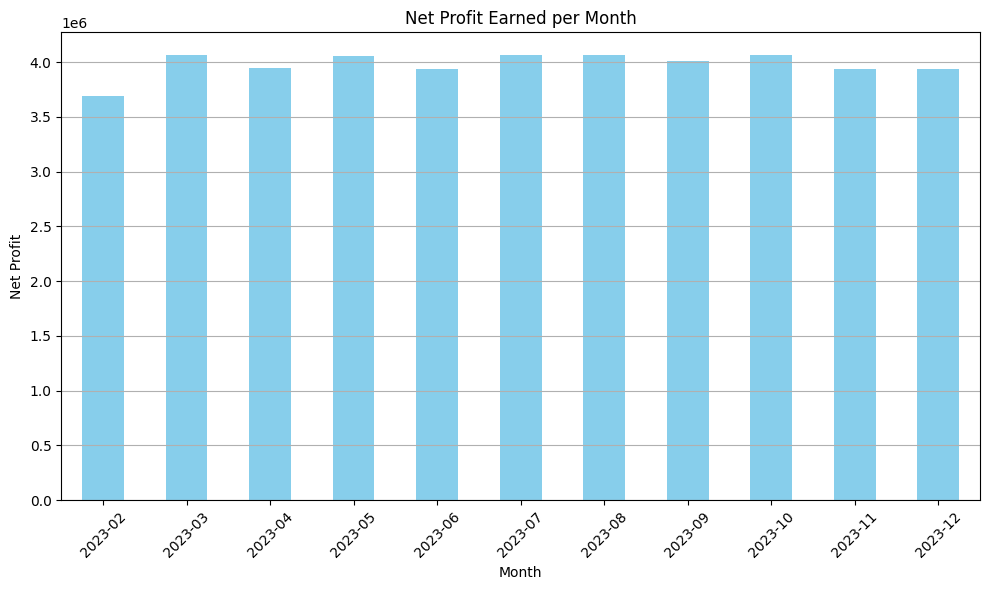

In [ ]:
data = {}

df['YearMonth'] = df['Order Date'].dt.to_period('M')

monthly_profit = df.groupby('YearMonth')['Net Profit'].sum()

plt.figure(figsize=(10, 6))
monthly_profit.plot(kind='bar', color='skyblue')
plt.title('Net Profit Earned per Month')
plt.xlabel('Month')
plt.ylabel('Net Profit')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Total Count of Products per Month

### **Season-wise Purchase Pattern**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


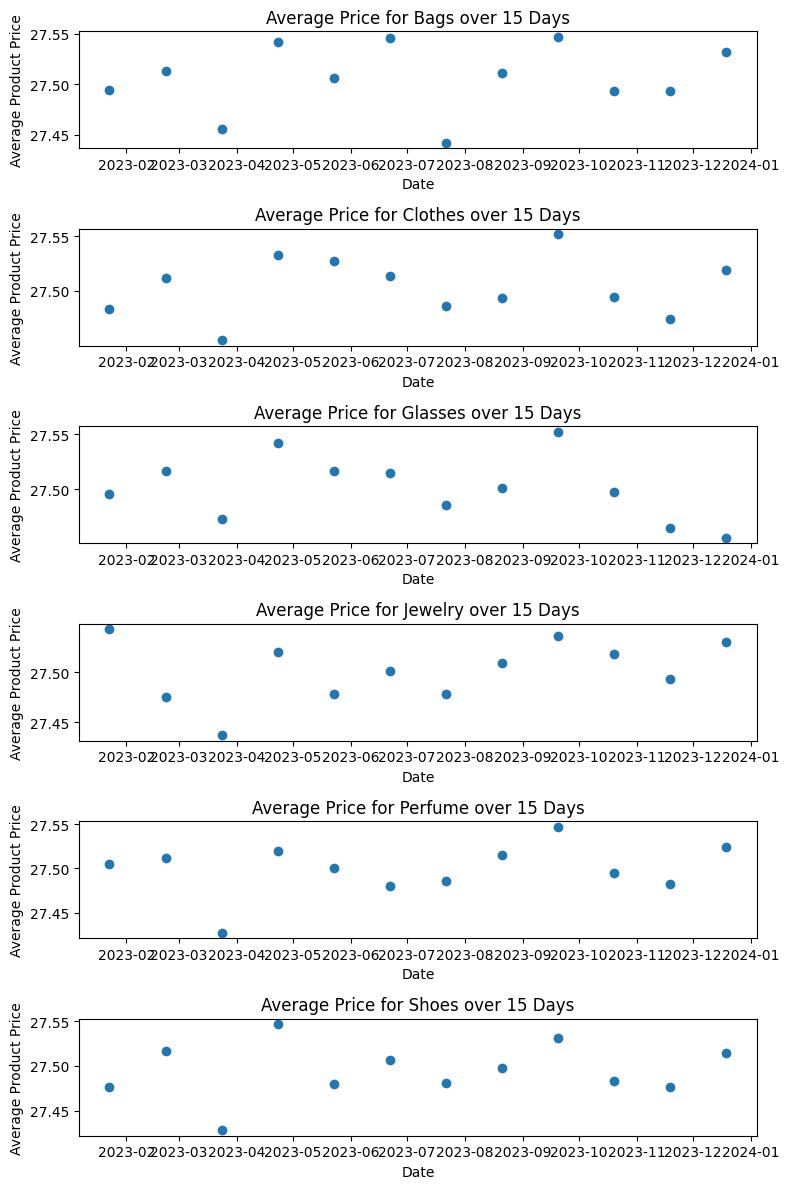

In [ ]:
exploded_df = df.explode('Ordered Items')
exploded_df[['Product', 'Item Type']] = pd.DataFrame(exploded_df['Ordered Items'].tolist(), index=exploded_df.index)
exploded_df['Prices'] = exploded_df['Product Prices'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else None)

exploded_df['Date Group'] = exploded_df['Order Date'].dt.floor('30D')
avg_price_per_type_date = exploded_df.groupby(['Item Type', 'Date Group'])['Prices'].mean().reset_index()
item_types = avg_price_per_type_date['Item Type'].unique()

fig, axes = plt.subplots(nrows=len(item_types), ncols=1, figsize=(8, 2 * len(item_types)))

for i, item_type in enumerate(item_types):
    data = avg_price_per_type_date[avg_price_per_type_date['Item Type'] == item_type]
    axes[i].scatter(data['Date Group'], data['Prices'])
    axes[i].set_title(f'Average Price for {item_type} over 15 Days')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Average Product Price')

plt.tight_layout()
plt.show()

## **KEY FINDINGS - QUESTIONS/ANSWERS**

### Q1: Discover the Joint Probability Distribution among 3 Discrete Categorical variables. Find how does item type effect the Mode of Shopping Chosen and the Coupon Code selected

In [ ]:
unique_item_types = ['Perfume','Jewelry','Clothes','Bags','Glasses','Shoes']
for item_type in unique_item_types:

    subset = df[df['Item Type'].apply(lambda x: item_type in x)]
    joint_prob = subset.groupby(['Mode of Shopping', 'Coupon Code']).size() / len(subset)

    print(f"Joint probabilities for Item Type '{item_type}' against Mode of Shopping and Coupon Code:")
    d = pd.DataFrame(joint_prob)
    display(d)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Joint probabilities for Item Type 'Perfume' against Mode of Shopping and Coupon Code:


0
Mode of Shopping Coupon Code          
BOPIS            DISCOUNT20   0.049692
                 FREESHIP     0.050681
                 GET50OFF     0.050353
                 SALE25       0.050507
                 SAVE10       0.049991
POS              DISCOUNT20   0.050434
                 FREESHIP     0.050315
                 GET50OFF     0.049023
                 SALE25       0.049492
                 SAVE10       0.050148
Ship-to-Address  DISCOUNT20   0.049662
                 FREESHIP     0.049858
                 GET50OFF     0.050140
                 SALE25       0.050481
                 SAVE10       0.049360
Ship-to-Store    DISCOUNT20   0.050114
                 FREESHIP     0.049564
                 GET50OFF     0.050080
                 SALE25       0.049389
                 SAVE10       0.050715

Joint probabilities for Item Type 'Jewelry' against Mode of Shopping and Coupon Code:


0
Mode of Shopping Coupon Code          
BOPIS            DISCOUNT20   0.049674
                 FREESHIP     0.050644
                 GET50OFF     0.049934
                 SALE25       0.050884
                 SAVE10       0.049938
POS              DISCOUNT20   0.050226
                 FREESHIP     0.049977
                 GET50OFF     0.049650
                 SALE25       0.049223
                 SAVE10       0.050442
Ship-to-Address  DISCOUNT20   0.049674
                 FREESHIP     0.049737
                 GET50OFF     0.049958
                 SALE25       0.050255
                 SAVE10       0.049449
Ship-to-Store    DISCOUNT20   0.050289
                 FREESHIP     0.049617
                 GET50OFF     0.050054
                 SALE25       0.049876
                 SAVE10       0.050500

Joint probabilities for Item Type 'Clothes' against Mode of Shopping and Coupon Code:


0
Mode of Shopping Coupon Code          
BOPIS            DISCOUNT20   0.050074
                 FREESHIP     0.050775
                 GET50OFF     0.050243
                 SALE25       0.050409
                 SAVE10       0.049814
POS              DISCOUNT20   0.050197
                 FREESHIP     0.050010
                 GET50OFF     0.049470
                 SALE25       0.049406
                 SAVE10       0.050108
Ship-to-Address  DISCOUNT20   0.049640
                 FREESHIP     0.050078
                 GET50OFF     0.049619
                 SALE25       0.050507
                 SAVE10       0.049776
Ship-to-Store    DISCOUNT20   0.050549
                 FREESHIP     0.049462
                 GET50OFF     0.050137
                 SALE25       0.049419
                 SAVE10       0.050307

Joint probabilities for Item Type 'Bags' against Mode of Shopping and Coupon Code:


0
Mode of Shopping Coupon Code          
BOPIS            DISCOUNT20   0.050010
                 FREESHIP     0.050819
                 GET50OFF     0.050083
                 SALE25       0.050287
                 SAVE10       0.049870
POS              DISCOUNT20   0.050466
                 FREESHIP     0.050138
                 GET50OFF     0.049235
                 SALE25       0.049056
                 SAVE10       0.050032
Ship-to-Address  DISCOUNT20   0.049414
                 FREESHIP     0.050266
                 GET50OFF     0.050330
                 SALE25       0.050342
                 SAVE10       0.049418
Ship-to-Store    DISCOUNT20   0.050428
                 FREESHIP     0.049644
                 GET50OFF     0.050164
                 SALE25       0.049469
                 SAVE10       0.050530

Joint probabilities for Item Type 'Glasses' against Mode of Shopping and Coupon Code:


0
Mode of Shopping Coupon Code          
BOPIS            DISCOUNT20   0.049971
                 FREESHIP     0.050994
                 GET50OFF     0.050170
                 SALE25       0.050534
                 SAVE10       0.049205
POS              DISCOUNT20   0.050453
                 FREESHIP     0.050046
                 GET50OFF     0.049805
                 SALE25       0.049527
                 SAVE10       0.049827
Ship-to-Address  DISCOUNT20   0.050212
                 FREESHIP     0.050062
                 GET50OFF     0.049934
                 SALE25       0.050068
                 SAVE10       0.049671
Ship-to-Store    DISCOUNT20   0.049859
                 FREESHIP     0.049661
                 GET50OFF     0.049848
                 SALE25       0.049623
                 SAVE10       0.050528

Joint probabilities for Item Type 'Shoes' against Mode of Shopping and Coupon Code:


0
Mode of Shopping Coupon Code          
BOPIS            DISCOUNT20   0.049911
                 FREESHIP     0.050795
                 GET50OFF     0.050502
                 SALE25       0.050323
                 SAVE10       0.049834
POS              DISCOUNT20   0.050123
                 FREESHIP     0.050361
                 GET50OFF     0.049286
                 SALE25       0.049567
                 SAVE10       0.050026
Ship-to-Address  DISCOUNT20   0.049792
                 FREESHIP     0.049775
                 GET50OFF     0.049975
                 SALE25       0.050621
                 SAVE10       0.049575
Ship-to-Store    DISCOUNT20   0.049987
                 FREESHIP     0.049350
                 GET50OFF     0.050289
                 SALE25       0.049448
                 SAVE10       0.050459

### Q2: Find the probability of average Ratings exceeding 3.5 over next 30 days

### **Method 1: Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

X = pd.to_numeric(df['Order Date']).values.reshape(-1, 1)

df['Rating Mean'] = df['Product Rating'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0)

y = df['Rating Mean'].values

model = LinearRegression()
model.fit(X, y)

future_date = pd.Timestamp.now() + pd.DateOffset(days=365)

numeric_future_date = future_date.value
numeric_future_date = np.array(numeric_future_date).reshape(-1,1)
future_rating = model.predict(numeric_future_date)

prob = (future_rating > 4.5)

print(f"Forecasted Future Average Rating: {future_rating[0]}")
print(f"Probability of Exceeding 3.5: {prob[0]}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Forecasted Future Average Rating: 3.499493622785076
Probability of Exceeding 3.5: False


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

df['Order Date'] = pd.to_datetime(df['Order Date'])

product_data = []

for index, row in df.iterrows():
    order_date = row['Order Date']
    for item, rating in zip(row['Ordered Items'], row['Product Rating']):
        product_name = item[0]
        product_data.append({'Product': product_name, 'Rating': rating, 'Month': order_date.month})

product_df = pd.DataFrame(product_data)
average_ratings = product_df.groupby(['Product', 'Month'])['Rating'].mean().unstack()

average_ratings_transposed = average_ratings.transpose()

future_months = 12

for product_to_predict in average_ratings_transposed.columns:
    product_data = average_ratings_transposed[product_to_predict]

    model = SARIMAX(product_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit()

    model2 = ARIMA(product_data, order=(1, 1, 1))
    model_fit2 = model2.fit()

    predicted_ratings = model_fit.forecast(steps=future_months)
    predicted_ratings2 = model_fit2.forecast(steps=future_months)

    print(f"Predicted ratings for '{product_to_predict}' over the next year:")
    for month, rating in zip(range(1, future_months + 1), predicted_ratings):
      if month == 12:
        print(f"Month {month}: {rating:.2f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too fe

Predicted ratings for 'Backpack' over the next year:
Month 12: 5.25


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Predicted ratings for 'Boots' over the next year:
Month 12: 5.25


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Predicted ratings for 'Clutch' over the next year:
Month 12: 5.25


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Predicted ratings for 'Designer Bag' over the next year:
Month 12: 5.25


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stats

Predicted ratings for 'Designer Watch' over the next year:
Month 12: 5.26


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Predicted ratings for 'Diamond Earrings' over the next year:
Month 12: 5.26


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Predicted ratings for 'Diamond Ring' over the next year:
Month 12: 5.25


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stats

Predicted ratings for 'Eyeglasses' over the next year:
Month 12: 5.23


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Predicted ratings for 'Formal Shirt' over the next year:
Month 12: 5.23


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Predicted ratings for 'Gold Necklace' over the next year:
Month 12: 5.26
Predicted ratings for 'Handbag' over the next year:
Month 12: 5.21


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/li

Predicted ratings for 'High Heels' over the next year:
Month 12: 5.25


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Predicted ratings for 'Jeans' over the next year:
Month 12: 5.29


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Predicted ratings for 'Leather Shoes' over the next year:
Month 12: 5.26


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Predicted ratings for 'Leather Wallet' over the next year:
Month 12: 5.26
Predicted ratings for 'Perfume - Citrus' over the next year:
Month 12: 5.27


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Like

Predicted ratings for 'Perfume - Floral' over the next year:
Month 12: 5.25
Predicted ratings for 'Perfume - Fresh' over the next year:
Month 12: 5.21


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Predicted ratings for 'Perfume - Oriental' over the next year:
Month 12: 5.23
Predicted ratings for 'Perfume - Spicy' over the next year:
Month 12: 5.27


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Predicted ratings for 'Perfume - Woody' over the next year:
Month 12: 5.23


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Predicted ratings for 'Reading Glasses' over the next year:
Month 12: 5.27


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Predicted ratings for 'Running Shoes' over the next year:
Month 12: 5.24


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Predicted ratings for 'Sandals' over the next year:
Month 12: 5.23


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Predicted ratings for 'Skirt' over the next year:
Month 12: 5.27
Predicted ratings for 'Sneakers' over the next year:

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/li


Month 12: 5.28


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Predicted ratings for 'Sunglasses' over the next year:
Month 12: 5.24


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Predicted ratings for 'T-Shirt' over the next year:
Month 12: 5.24


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

Predicted ratings for 'Tote Bag' over the next year:
Month 12: 5.22
Predicted ratings for 'Traditional Dress' over the next year:
Month 12: 5.24
Predicted ratings for 'Western Suit' over the next year:
Month 12: 5.27


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### Q3-Q7: Conditional, Total, and Independent Probability related Questions

### Q3: What's the probability that a person will buy both Boots and Sandals in a single order?

In [ ]:
clothes_data = df[df.apply(lambda row: 'Shoes' in row['Item Type'] and 'Boots' in row['Ordered Items'] and 'Sandals' in row['Ordered Items'], axis=1)]

count_both_items = len(clothes_data)
count_other_clothes = len(clothes_data[clothes_data.apply(lambda row: any(item != 'Shoes' for item in row['Item Type'] if item not in ['Boots', 'Sandals']), axis=1)])

if count_both_items > 0:
    probability = count_other_clothes / count_both_items
    print(f"The probability of buying something else from 'Shoes' given the purchase of both items is: {probability:.4f}")
else:
    print("No instances found where both 'Boots' and 'Sandals' were bought together.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No instances found where both 'Boots' and 'Sandals' were bought together.


### Q4: What's the probability that a person will buy ONLY both Boots and Sandals in a single order?

In [ ]:
clothes_data = df[df.apply(lambda row: 'Boots' in row['Ordered Items'] and 'Sandals' in row['Ordered Items']
                            and all(item == 'Boots' or item == 'Sandals' for item in row['Ordered Items'] if item not in ['Boots', 'Sandals']), axis=1)]

count_only_boots_sandals = len(clothes_data)

if count_only_boots_sandals > 0:
    total_orders = len(df)
    probability = count_only_boots_sandals / total_orders
    print(f"The probability of purchasing only 'Boots' and 'Sandals' in an order is: {probability:.4f}")
else:
    print("No instances found where only 'Boots' and 'Sandals' were purchased together.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No instances found where only 'Boots' and 'Sandals' were purchased together.


### Q5: Given that a person has purchased 'Traditional Dress' and 'Western Suit', what's the probability that he/she will purchase something else from close within the same order line?

In [ ]:
def has_items(row, item1, item2, item_type):
    for item, i_type in row['Ordered Items']:
        if (item == item1 and i_type == item_type) or (item == item2 and i_type == item_type):
            return True
    return False

clothes_data = df[df.apply(lambda row: has_items(row, 'Traditional Dress', 'Western Suit', 'Clothes'), axis=1)]

count_both_items = len(clothes_data)

def bought_other_clothes(row, item1, item2, item_type):
    for item, i_type in row['Ordered Items']:
        if item_type == i_type and item not in [item1, item2]:
            return True
    return False

count_other_clothes = len(clothes_data[clothes_data.apply(lambda row: bought_other_clothes(row, 'Traditional Dress', 'Western Suit', 'Clothes'), axis=1)])

if count_both_items > 0:
    probability = count_other_clothes / count_both_items
    print(f"The probability of buying something else from 'Clothes' given the purchase of both items is: {probability:.4f}")
else:
    print("No instances found where both 'Traditional Dress' and 'Western Suit' were bought together.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The probability of buying something else from 'Clothes' given the purchase of both items is: 0.8280


### Q6: Given that a person has purchased 'Traditional Dress' and 'Western Suit', what's the probability that he/she will purchase exactly 3 more items from clothes within the same order line?

In [ ]:
def has_items(row, items, item_type):
    item_count = 0
    for item, i_type in row['Ordered Items']:
        if item in items and i_type == item_type:
            item_count += 1
    return item_count

clothes_data = df[df.apply(lambda row: has_items(row, ['Traditional Dress', 'Western Suit'], 'Clothes') == 2, axis=1)]

count_both_items = len(clothes_data)

def bought_other_clothes(row, items, item_type):
    item_count = 0
    for item, i_type in row['Ordered Items']:
        if i_type == item_type and item not in items:
            item_count += 1
    return item_count >= 3

count_buy_three_more = len(clothes_data[clothes_data.apply(lambda row: bought_other_clothes(row, ['Traditional Dress', 'Western Suit'], 'Clothes'), axis=1)])

if count_both_items > 0:
    probability = count_buy_three_more / count_both_items
    print(f"The probability of buying 3 more items from 'Clothes' given the purchase of both items is: {probability:.4f}")
else:
    print("No instances found where both 'Traditional Dress' and 'Western Suit' were bought together.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The probability of buying 3 more items from 'Clothes' given the purchase of both items is: 0.2803


### Q7: Find the probability that a person will buy at least one item from Perfume, Clothes, Bags, and Shoes only in a single order

In [ ]:
def has_all_items(item_list):
    required_items = {'Perfume', 'Clothes', 'Bags', 'Shoes'}
    return all(item in item_list for item in required_items)

all_items_purchases = df[df['Item Type'].apply(has_all_items)]

total_purchases = len(df)
probability_all_items = len(all_items_purchases) / total_purchases

print(f"The probability that a person buys Perfumes, Clothes, Bags, and Shoes together is: {probability_all_items:.4f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The probability that a person buys Perfumes, Clothes, Bags, and Shoes together is: 0.6031


### Q8: Given that a person has purchased "Western Suit" and "Sandals", what's the probability that he/she will also buy a perfume and a designer bag?

In [ ]:
def has_western_suit(item_list):
    return any(item[0] == 'Western Suit' for item in item_list)

def has_sandals(item_list):
    return any(item[0] == 'Sandals' for item in item_list)

def has_perfume_and_designer_bag(item_list):
    return any(item[1] == 'Perfume' for item in item_list) and any(item[0] == 'Designer Bag' for item in item_list)

def has_anything_else_from_shoes(item_list):
    return any(item[1].startswith('Shoes') and item[0] != 'Sandals' for item in item_list)

western_suit_purchases = df[df['Ordered Items'].apply(has_western_suit)]
sandals_purchases = df[df['Ordered Items'].apply(has_sandals)]
perfume_designer_bag_purchases = df[df['Ordered Items'].apply(has_perfume_and_designer_bag)]
anything_else_shoes_purchases = df[df['Ordered Items'].apply(has_anything_else_from_shoes)]

total_western_suit_purchases = len(western_suit_purchases)
western_suit_and_sandals_purchases = len(western_suit_purchases[western_suit_purchases['Ordered Items'].apply(has_sandals)])
western_suit_sandals_perfume_designer_bag_purchases = len(western_suit_purchases[western_suit_purchases['Ordered Items'].apply(has_perfume_and_designer_bag)])
western_suit_sandals_anything_else_shoes_purchases = len(western_suit_purchases[western_suit_purchases['Ordered Items'].apply(has_anything_else_from_shoes)])

conditional_probability = (western_suit_sandals_perfume_designer_bag_purchases / total_western_suit_purchases) * (western_suit_sandals_anything_else_shoes_purchases / total_western_suit_purchases)

print(f"The conditional probability is: {conditional_probability:.4f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The conditional probability is: 0.3588


### **CREATING FINANCIAL POLICY VIA STATISTICAL MEASURES**

### Q9: Find the average ratings each product has maintained monthly

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

product_data = []

for index, row in df.iterrows():
    order_date = row['Order Date']
    for item, rating in zip(row['Ordered Items'], row['Product Rating']):
        product_name = item[0]
        product_data.append({'Product': product_name, 'Rating': rating, 'Month': order_date.month})

product_df = pd.DataFrame(product_data)
average_ratings = product_df.groupby(['Product', 'Month'])['Rating'].mean().unstack()

display(average_ratings)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Month,2,3,4,5,6,7,8,9,10,11,12
Product,,,,,,,,,,,
Backpack,3.502303,3.499889,3.506841,3.503208,3.507002,3.505759,3.510817,3.506233,3.493593,3.501243,3.498263
Boots,3.495191,3.497785,3.495488,3.497008,3.495357,3.486669,3.508123,3.511173,3.492011,3.499429,3.498076
Clutch,3.520216,3.505948,3.499366,3.506409,3.508825,3.483084,3.504425,3.512843,3.507886,3.513983,3.503367
Designer Bag,3.496024,3.499031,3.490355,3.503522,3.494253,3.523690,3.491383,3.504603,3.492048,3.490508,3.498421
Designer Watch,3.481436,3.513354,3.507279,3.508435,3.495404,3.497173,3.516788,3.492830,3.487832,3.501100,3.502217
Diamond Earrings,3.492382,3.500536,3.499381,3.501048,3.516655,3.505065,3.503325,3.494296,3.494116,3.499391,3.500737
Diamond Ring,3.476957,3.499696,3.500768,3.518161,3.510261,3.494798,3.507459,3.491590,3.479575,3.508367,3.491787
Eyeglasses,3.490297,3.495867,3.487232,3.514819,3.504240,3.495082,3.514708,3.500227,3.499298,3.503062,3.486077
Formal Shirt,3.487396,3.507444,3.500182,3.502975,3.503011,3.502029,3.483223,3.518059,3.514721,3.497325,3.485429


In [ ]:
clothes_purchases = df[df['Item Type'].apply(lambda x: 'Clothes' in x)]
clothes_perfume_purchases = clothes_purchases[clothes_purchases['Item Type'].apply(lambda x: 'Perfume' in x)]
probability_clothes_to_perfume = len(clothes_perfume_purchases) / len(clothes_purchases)

print(f"The probability that a person who buys Clothes will also buy Perfume is: {probability_clothes_to_perfume:.4f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The probability that a person who buys Clothes will also buy Perfume is: 0.8701


### Q10: Find the expected time when the Net Cumulative Profit will double it's yearly total

In [ ]:
from sklearn.linear_model import LinearRegression
df['Days'] = (df['Order Date'] - df['Order Date'].min()).dt.days
df['Cumsum NetP'] = df['Net Profit'].cumsum()
X = df[['Days']]
y = df['Cumsum NetP']

model = LinearRegression()
model.fit(X, y)

forecast_steps = 700
future_dates = pd.date_range(start=df['Order Date'].max(), periods=forecast_steps)
future_days = (future_dates - df['Order Date'].min()).days.values.reshape(-1, 1)
forecast_values = model.predict(future_days)
initial_cumulative_net_profit = df['Cumsum NetP'].iloc[-1]
double_profit_index = next((i for i, val in enumerate(forecast_values) if val >= 2 * initial_cumulative_net_profit), None)

if double_profit_index is not None:

    expected_date_double_profit = future_dates[double_profit_index]
    print(f"The expected date when cumulative net profit may double: {expected_date_double_profit}")
else:
    print("Cumulative net profit may not double within the forecast period.")

The expected date when cumulative net profit may double: 2024-11-28 23:59:50


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


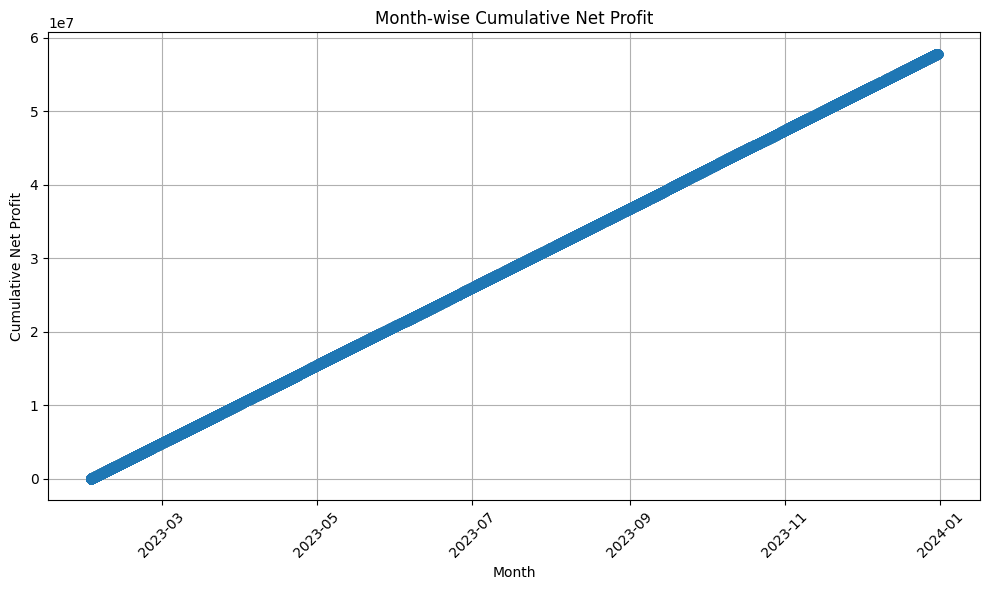

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Order Date'], df['Cumulative Net Profit'], marker='o', linestyle='-')
plt.title('Month-wise Cumulative Net Profit')
plt.xlabel('Month')
plt.ylabel('Cumulative Net Profit')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q11 (a): Find the least contributing item type and it's contribution

In [ ]:
df['Product Type'] = df['Ordered Items'].apply(lambda items: [item[1] for item in items])
df_exploded = df.explode('Product Type')
profit_by_product_type = df_exploded.groupby('Product Type')['Net Profit'].sum().reset_index()
least_contributing_product = profit_by_product_type.loc[profit_by_product_type['Net Profit'].idxmin()]

print(f"The product type contributing the least to net profit is: {least_contributing_product['Product Type']}")
print(f"Net profit contributed: {least_contributing_product['Net Profit']}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The product type contributing the least to net profit is: Glasses
Net profit contributed: 57815342.64969765


### Q11 (b): Find the net profit contribution for each item type

In [ ]:
profit_by_product_type = df_exploded.groupby('Product Type')['Net Profit'].sum().reset_index()
print(profit_by_product_type)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Product Type    Net Profit
0         Bags  1.158627e+08
1      Clothes  1.158293e+08
2      Glasses  5.781534e+07
3      Jewelry  7.713368e+07
4      Perfume  1.157652e+08
5        Shoes  1.157396e+08


In [ ]:
df_exploded['Month'] = df_exploded['Order Date'].dt.to_period('M')

profit_by_product_type_month = df_exploded.groupby(['Product Type', 'Month'])['Net Profit'].sum().reset_index()

display(profit_by_product_type_month)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Product Type,Month,Net Profit
0,Bags,2023-02,9.838451e+06
1,Bags,2023-03,1.072566e+07
2,Bags,2023-04,1.042712e+07
3,Bags,2023-05,1.063099e+07
4,Bags,2023-06,1.038287e+07
...,...,...,...
61,Shoes,2023-08,1.079599e+07
62,Shoes,2023-09,1.067022e+07
63,Shoes,2023-10,1.081213e+07
64,Shoes,2023-11,1.045015e+07


### Confirming the contribution per product

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


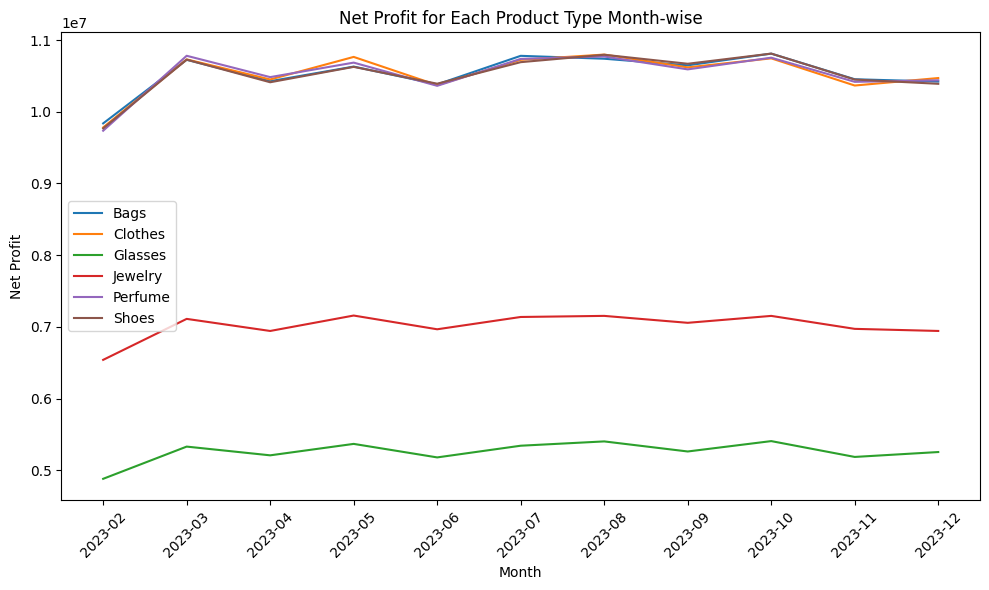

In [ ]:
profit_by_product_type_month['Month'] = profit_by_product_type_month['Month'].astype(str)
product_types = profit_by_product_type_month['Product Type'].unique()

plt.figure(figsize=(10, 6))

for product_type in product_types:
    data = profit_by_product_type_month[profit_by_product_type_month['Product Type'] == product_type]
    plt.plot(data['Month'], data['Net Profit'], label=product_type)

plt.title('Net Profit for Each Product Type Month-wise')
plt.xlabel('Month')
plt.ylabel('Net Profit')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q12: FInd the least contributing and contributions of all the products to the net profit

In [ ]:
df['Product Name'] = df['Ordered Items'].apply(lambda items: [item[0] for item in items])
df_exploded = df.explode('Product Name')
profit_by_product_type = df_exploded.groupby('Product Name')['Net Profit'].sum().reset_index()
least_contributing_product = profit_by_product_type.loc[profit_by_product_type['Net Profit'].idxmin()]

print(f"The product type contributing the least to net profit is: {least_contributing_product['Product Name']}")
print(f"Net profit contributed: {least_contributing_product['Net Profit']}")

print(profit_by_product_type)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The product type contributing the least to net profit is: Perfume - Citrus
Net profit contributed: 19191442.07841888
          Product Name    Net Profit
0             Backpack  1.935713e+07
1                Boots  1.935523e+07
2               Clutch  1.925532e+07
3         Designer Bag  1.929735e+07
4       Designer Watch  1.930764e+07
5     Diamond Earrings  1.927890e+07
6         Diamond Ring  1.927996e+07
7           Eyeglasses  1.928943e+07
8         Formal Shirt  1.939685e+07
9        Gold Necklace  1.926718e+07
10             Handbag  1.933323e+07
11          High Heels  1.928948e+07
12               Jeans  1.924257e+07
13       Leather Shoes  1.929458e+07
14      Leather Wallet  1.934004e+07
15    Perfume - Citrus  1.919144e+07
16    Perfume - Floral  1.933775e+07
17     Perfume - Fresh  1.936232e+07
18  Perfume - Oriental  1.935068e+07
19     Perfume - Spicy  1.928087e+07
20     Perfume - Woody  1.924218e+07
21     Reading Glasses  1.931426e+07
22       Running Shoes  1.930072

### Bivariate Effect Analysis

### Q13: What is the effect of Mode of Shipping on Rating? Create a probability distribution to study the effect that what if rating is being disturbed due to Mode of Shopping.

[Also, there maybe an issue with probability distribution being summed to 1 per rating as there were 2 (Unknown and NaN) Mode of Shopping weren't included]

In [ ]:
exploded_df = df.explode('Product Rating')
selected_columns = ['Mode of Shopping', 'Product Rating']
selected_data = exploded_df[selected_columns]

selected_data = selected_data.dropna(subset=selected_columns)
joint_probability = selected_data.groupby(selected_columns).size().div(len(selected_data)).reset_index(name='Probability')

pivot_table = joint_probability.pivot(index='Mode of Shopping', columns='Product Rating', values='Probability').fillna(0)
display(pivot_table)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Product Rating,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,...,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
Mode of Shopping,,,,,,,,,,,,,,,,,,,,,
BOPIS,0.004173,0.008434,0.008461,0.008369,0.008306,0.008335,0.008352,0.008349,0.008399,0.008443,...,0.008397,0.008389,0.008311,0.008340,0.008340,0.008308,0.008368,0.008321,0.008402,0.004224
POS,0.004188,0.008314,0.008366,0.008282,0.008312,0.008323,0.008345,0.008236,0.008297,0.008364,...,0.008268,0.008323,0.008378,0.008275,0.008347,0.008292,0.008261,0.008257,0.008320,0.004190
Ship-to-Address,0.004150,0.008183,0.008322,0.008232,0.008517,0.008339,0.008365,0.008364,0.008267,0.008242,...,0.008219,0.008307,0.008281,0.008295,0.008265,0.008276,0.008313,0.008410,0.008357,0.004234
Ship-to-Store,0.004127,0.008398,0.008307,0.008398,0.008339,0.008416,0.008389,0.008270,0.008355,0.008316,...,0.008246,0.008360,0.008298,0.008337,0.008340,0.008424,0.008339,0.008444,0.008298,0.004130


### Q14: Find probability distribution for ratings per maximum number of items bought within an order (to see if rating type is in anyway affected by the behaviour of customer and if the customer is giving away forged ratings)

In [ ]:
df['Num_Items'] = df['Ordered Items'].apply(len)
exploded_df = df.explode('Product Rating')

selected_columns = ['Num_Items', 'Product Rating']
selected_data = exploded_df[selected_columns]
selected_data = selected_data.dropna(subset=selected_columns)

joint_probability = selected_data.groupby(selected_columns).size().div(len(selected_data)).reset_index(name='Probability')
pivot_table = joint_probability.pivot(index='Num_Items', columns='Product Rating', values='Probability').fillna(0)
display(pivot_table)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Product Rating,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,...,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
Num_Items,,,,,,,,,,,,,,,,,,,,,
1,0.000081,0.000155,0.000155,0.000159,0.000160,0.000150,0.000161,0.000156,0.000160,0.000163,...,0.000155,0.000163,0.000167,0.000155,0.000156,0.000168,0.000158,0.000146,0.000165,0.000079
2,0.000167,0.000324,0.000326,0.000319,0.000308,0.000324,0.000314,0.000309,0.000323,0.000318,...,0.000310,0.000317,0.000332,0.000322,0.000301,0.000334,0.000304,0.000303,0.000295,0.000151
3,0.000233,0.000473,0.000484,0.000464,0.000494,0.000479,0.000475,0.000468,0.000467,0.000470,...,0.000462,0.000477,0.000468,0.000469,0.000457,0.000477,0.000484,0.000462,0.000472,0.000246
4,0.000289,0.000634,0.000618,0.000637,0.000635,0.000639,0.000645,0.000629,0.000635,0.000632,...,0.000598,0.000625,0.000641,0.000611,0.000623,0.000637,0.000615,0.000659,0.000613,0.000311
5,0.000393,0.000807,0.000791,0.000805,0.000807,0.000827,0.000773,0.000786,0.000803,0.000774,...,0.000793,0.000788,0.000799,0.000804,0.000783,0.000802,0.000786,0.000785,0.000792,0.000392
6,0.000469,0.000989,0.000981,0.000960,0.000976,0.000949,0.000929,0.000941,0.000946,0.000965,...,0.000962,0.000961,0.000959,0.000948,0.000934,0.000937,0.000955,0.001002,0.000959,0.000495
7,0.000578,0.001120,0.001082,0.001104,0.001084,0.001110,0.001147,0.001121,0.001090,0.001092,...,0.001108,0.001141,0.001112,0.001102,0.001123,0.001072,0.001113,0.001095,0.001128,0.000555
8,0.000636,0.001288,0.001264,0.001291,0.001287,0.001287,0.001269,0.001279,0.001237,0.001301,...,0.001287,0.001305,0.001277,0.001237,0.001292,0.001259,0.001282,0.001308,0.001320,0.000643
9,0.000693,0.001468,0.001404,0.001412,0.001397,0.001412,0.001402,0.001408,0.001433,0.001450,...,0.001383,0.001423,0.001417,0.001436,0.001451,0.001430,0.001445,0.001404,0.001387,0.000718


### **Probability Again**

### Q15: What's the probability that every customer will shop again?

#### Adding 1000 new customers (since all current customers are repeated customers)

In [ ]:
!pip install faker

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from faker import Faker
import pandas as pd
import random

fake = Faker()
num_rows_to_add = 1000
new_data = []

for _ in range(num_rows_to_add):
    customer_id = ''.join([str(random.randint(0, 9)) for _ in range(7)])
    customer_name = fake.name()
    email = f"{customer_name.replace(' ', '').lower()}@domain.com"
    new_data.append([int(customer_id), customer_name, email])

new_df = pd.DataFrame(new_data, columns=['Customer ID', 'Customer Name', 'Email'])
df = pd.concat([df, new_df], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
purchase_count = df.groupby('Customer ID').size()
repeat_customers = purchase_count[purchase_count > 1].index
total_customers = df['Customer ID'].nunique()
repeat_shopped_again = df[df.duplicated(subset='Customer ID', keep=False)]
num_repeat_shopped_again = len(repeat_shopped_again['Customer ID'].unique())
probability_all_shopped_again = num_repeat_shopped_again / total_customers

print(f"The probability that every customer will shop again is: {probability_all_shopped_again:.4f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The probability that every customer will shop again is: 0.9000


### Discovering the continuous probability distribution for fun

## **MARKET BASKET ANALYSIS**

### Q16: Find the products that can be most purchased (in pairs)

In [4]:
transactions = df['Ordered Items'].apply(lambda x: [item[0] for item in x] if isinstance(x, list) else []).tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Generating itemsets

frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

filtered_rules = rules[
    rules['antecedents'].apply(lambda x: any(item in x for item in te.columns_ if isinstance(item, str))) |
    rules['consequents'].apply(lambda x: any(item in x for item in te.columns_ if isinstance(item, str)))
]

pivot_table = filtered_rules.pivot(index='antecedents', columns='consequents', values='confidence')

display(pivot_table)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


consequents,(Backpack),(Tote Bag),(T-Shirt),(Sunglasses),(Sneakers),(Skirt),(Sandals),(Running Shoes),(Reading Glasses),(Perfume - Woody),...,(Formal Shirt),(Eyeglasses),(Diamond Ring),(Diamond Earrings),(Designer Watch),(Designer Bag),(Clutch),(Boots),(Leather Wallet),(Western Suit)
antecedents,,,,,,,,,,,,,,,,,,,,,
(Boots),0.424670,0.421150,0.423527,0.421397,0.421407,0.422972,0.420965,0.422992,0.421130,0.419637,...,0.421860,0.421726,0.422303,0.421747,0.422560,0.422519,0.420996,NaN,0.421212,0.420646
(Tote Bag),0.422498,NaN,0.422271,0.419642,0.420387,0.422498,0.420532,0.422271,0.422405,0.423937,...,0.426896,0.421163,0.423471,0.422933,0.424247,0.424102,0.420977,0.423512,0.423761,0.421422
(T-Shirt),0.422870,0.421116,NaN,0.421012,0.421456,0.421085,0.421745,0.422210,0.423056,0.418154,...,0.425347,0.421838,0.419960,0.420651,0.422034,0.421590,0.422767,0.424738,0.422230,0.421477
(Sunglasses),0.423888,0.420569,0.423100,NaN,0.422612,0.426315,0.422311,0.421710,0.424438,0.420828,...,0.423380,0.422011,0.422498,0.420756,0.422789,0.420994,0.420164,0.424697,0.422083,0.421347
(Sneakers),0.421868,0.419575,0.421796,0.420866,NaN,0.421868,0.419399,0.423428,0.421507,0.420081,...,0.425018,0.422013,0.421878,0.420732,0.420856,0.421341,0.422188,0.422953,0.422488,0.419730
(Skirt),0.424279,0.420713,0.420455,0.423578,0.420899,NaN,0.421981,0.421867,0.424547,0.421156,...,0.425268,0.425670,0.423258,0.425701,0.422960,0.423011,0.421033,0.423547,0.422887,0.420528
(Sandals),0.423645,0.419802,0.422168,0.420649,0.419482,0.423036,NaN,0.422457,0.422932,0.423129,...,0.422705,0.420288,0.421083,0.421672,0.421093,0.422467,0.420990,0.422591,0.422664,0.419657
(Running Shoes),0.423036,0.420460,0.421553,0.418977,0.422429,0.421841,0.421377,NaN,0.422913,0.421738,...,0.423871,0.420594,0.420419,0.419708,0.421924,0.423181,0.419986,0.423541,0.422861,0.423294
(Reading Glasses),0.424646,0.421046,0.422851,0.422139,0.420963,0.424976,0.422304,0.423367,NaN,0.423717,...,0.424027,0.422046,0.423191,0.422521,0.422191,0.422170,0.420169,0.422129,0.423191,0.420860


### Q17: As a shop owner, what should I know about couplings of my products and items bought together and which pairing should I choose for maximum benefit?

In [5]:
transactions = df['Ordered Items'].apply(lambda x: [item[0] for item in x] if isinstance(x, list) else []).tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True, max_len=5)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

rules = pd.DataFrame(rules)
display(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Boots),(Backpack),0.340029,0.339735,0.144400,0.424670,1.250004,0.028880,1.147628,0.303047
1,(Backpack),(Boots),0.339735,0.340029,0.144400,0.425037,1.250004,0.028880,1.147850,0.302912
2,(Clutch),(Backpack),0.338363,0.339735,0.142668,0.421641,1.241089,0.027714,1.141619,0.293599
3,(Backpack),(Clutch),0.339735,0.338363,0.142668,0.419939,1.241089,0.027714,1.140633,0.294209
4,(Designer Bag),(Backpack),0.338961,0.339735,0.143647,0.423787,1.247407,0.028491,1.145871,0.300038
...,...,...,...,...,...,...,...,...,...,...
925,(Traditional Dress),(Tote Bag),0.339367,0.338132,0.142745,0.420620,1.243953,0.027994,1.142373,0.296853
926,(Western Suit),(Tote Bag),0.338545,0.338132,0.142496,0.420908,1.244804,0.028023,1.142941,0.297315
927,(Tote Bag),(Western Suit),0.338132,0.338545,0.142496,0.421422,1.244804,0.028023,1.143243,0.297129
928,(Western Suit),(Traditional Dress),0.338545,0.339367,0.142307,0.420350,1.238628,0.027416,1.139709,0.291260


In [ ]:
transactions = df['Ordered Items'].apply(lambda x: [item[0] for item in x] if isinstance(x, list) else []).tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True, max_len=4)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

rules = pd.DataFrame(rules)
display(rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Boots),(Backpack),0.338843,0.338550,0.143896,0.424670,1.254378,0.029181,1.149687,0.306723
1,(Backpack),(Boots),0.338550,0.338843,0.143896,0.425037,1.254378,0.029181,1.149913,0.306587
2,(Clutch),(Backpack),0.337183,0.338550,0.142170,0.421641,1.245432,0.028017,1.143667,0.297316
3,(Backpack),(Clutch),0.338550,0.337183,0.142170,0.419939,1.245432,0.028017,1.142667,0.297930
4,(Designer Bag),(Backpack),0.337779,0.338550,0.143147,0.423787,1.251772,0.028791,1.147927,0.303724
...,...,...,...,...,...,...,...,...,...,...
925,(Traditional Dress),(Tote Bag),0.338184,0.336953,0.142247,0.420620,1.248305,0.028295,1.144408,0.300558
926,(Western Suit),(Tote Bag),0.337364,0.336953,0.141999,0.420908,1.249160,0.028323,1.144977,0.301013
927,(Tote Bag),(Western Suit),0.336953,0.337364,0.141999,0.421422,1.249160,0.028323,1.145283,0.300826
928,(Western Suit),(Traditional Dress),0.337364,0.338184,0.141811,0.420350,1.242962,0.027720,1.141751,0.294989


### Q18: Find Probability of Choosing Mode of Shopping given the products

In [ ]:
sandals_and_boots = df['Ordered Items'].apply(lambda x: any(item[0] == 'Sandals' for item in x)
                                                    and any(item[0] == 'Boots' for item in x) if isinstance(x, list) else False)



prob_bopis_given_sb = df.loc[sandals_and_boots, 'Mode of Shopping'].value_counts(normalize=True).get('BOPIS', 0)
prob_no_coupon_given_sb = df.loc[sandals_and_boots, 'Coupon Code'].value_counts(normalize=True).get('FREESHIP', 0)
prob_bopis_or_no_coupon_given_sb = prob_bopis_given_sb + prob_no_coupon_given_sb - (prob_bopis_given_sb * prob_no_coupon_given_sb)

print(f"Probability of choosing BOPIS given Sandals and Boots: {prob_bopis_given_sb:.2f}")
print(f"Probability of using no Coupon Code given Sandals and Boots: {prob_no_coupon_given_sb:.2f}")
print(f"Probability of choosing BOPIS or using no Coupon Code given Sandals and Boots: {prob_bopis_or_no_coupon_given_sb:.2f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Probability of choosing BOPIS given Sandals and Boots: 0.25
Probability of using no Coupon Code given Sandals and Boots: 0.20
Probability of choosing BOPIS or using no Coupon Code given Sandals and Boots: 0.40


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


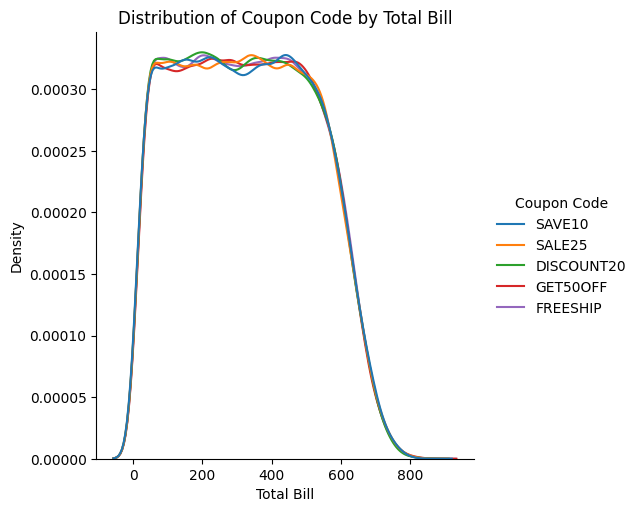

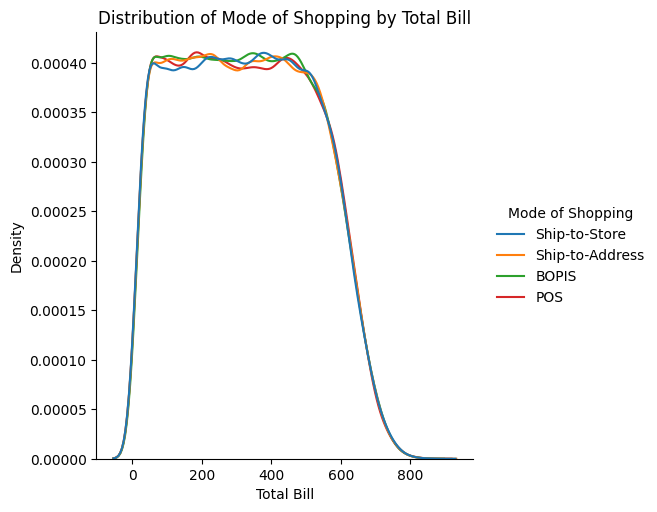

In [ ]:
sns.displot(df, x='Total Bill', kind='kde', hue='Coupon Code')
plt.title('Distribution of Coupon Code by Total Bill')
plt.show()

sns.displot(df, x='Total Bill', kind='kde', hue='Mode of Shopping')
plt.title('Distribution of Mode of Shopping by Total Bill')
plt.show()

### Predictive Analysis

### Q19: Given Prior probabilities and likelihood, predict the coupon code.

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

df2 = df.copy()

df2['Mode of Shopping'].fillna('Unknown', inplace=True)
df2['Coupon Code'].fillna('NOCOUPON', inplace=True)
label_encoder = LabelEncoder()
df2['Mode of Shopping'] = label_encoder.fit_transform(df2['Mode of Shopping'])
df2['Coupon Code'] = label_encoder.fit_transform(df2['Coupon Code'])
features = ['Total Bill', 'Mode of Shopping']
target = 'Coupon Code'
df2[features] = df2[features].fillna(df2[features].mean())

X = df2[features]
y = df2[target]
clf = GaussianNB()
clf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GaussianNB()

In [ ]:
test_data = pd.DataFrame({
    'Total Bill': [10, 2000, 180, 3000, 5000, 50],
    'Mode of Shopping': ['Ship-to-Address', 'BOPIS', 'BOPIS', 'Ship-to-Store', 'POS', 'POS']
})

test_data_encoded = pd.get_dummies(test_data, columns=['Mode of Shopping'])

missing_cols = set(X.columns) - set(test_data_encoded.columns)
for col in missing_cols:
    test_data_encoded[col] = 0

test_data_encoded = test_data_encoded[X.columns]
predictions = clf.predict(test_data_encoded)

print("Predicted Coupon Codes:")
predicted_coupons = label_encoder.inverse_transform(predictions)
print(predicted_coupons)

Predicted Coupon Codes:
['FREESHIP' 'SAVE10' 'FREESHIP' 'SAVE10' 'SAVE10' 'FREESHIP']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Q20: Find probability distribution, expected value, and variance of ratings variable (to predict every next order's rating and improve it)

In [ ]:
from collections import Counter
rating_counts = Counter(rating for ratings in df['Product Rating'] if isinstance(ratings, list) for rating in ratings)
total_ratings = sum(rating_counts.values())
rating_probabilities = {rating: count / total_ratings for rating, count in rating_counts.items()}

print("Rating | Probability")
print("-" * 20)
for rating, probability in rating_probabilities.items():
    print(f"{rating:<6} | {probability:.4f}")

expected_value = sum(rating * probability for rating, probability in rating_probabilities.items())
variance = sum((rating - expected_value) ** 2 * probability for rating, probability in rating_probabilities.items())

print(f"Expected Value (Mean): {expected_value}")
print(f"Variance: {variance}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rating | Probability
--------------------
2.1    | 0.0333
2.5    | 0.0334
4.3    | 0.0333
2.2    | 0.0335
4.9    | 0.0334
3.3    | 0.0334
4.0    | 0.0333
3.6    | 0.0334
2.4    | 0.0335
3.1    | 0.0331
2.6    | 0.0335
3.4    | 0.0334
2.9    | 0.0334
4.8    | 0.0334
3.9    | 0.0334
3.2    | 0.0335
4.5    | 0.0333
4.7    | 0.0333
4.1    | 0.0331
4.4    | 0.0332
2.3    | 0.0333
3.0    | 0.0331
4.2    | 0.0334
3.5    | 0.0334
4.6    | 0.0333
5.0    | 0.0168
2.7    | 0.0332
2.0    | 0.0166
3.8    | 0.0333
3.7    | 0.0333
2.8    | 0.0333
Expected Value (Mean): 3.499805087057895
Variance: 0.7520982926067459


### Q21: Which product has performed the least and should be removed?

In [ ]:
df['Product Name'] = df['Ordered Items'].apply(lambda x: [item[0] for item in x] if isinstance(x, list) else []).tolist()

df_exploded = df.explode('Product Name')
rating_by_product_type = df_exploded.explode('Product Rating').groupby('Product Name')['Product Rating'].mean().reset_index()
lowest_rated_product = rating_by_product_type.loc[rating_by_product_type['Product Rating'].idxmin()]

print(f"The product type with the lowest average rating is: {lowest_rated_product['Product Name']}")
print(f"Average rating: {lowest_rated_product['Product Rating']:.2f}")

print(rating_by_product_type)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
from collections import defaultdict
df['Product Name'] = df['Ordered Items'].apply(lambda x: [item[0] for item in x] if isinstance(x, list) else []).tolist()
product_ratings = defaultdict(list)
for index, row in df.iterrows():
    items = row['Product Name']
    ratings = row['Product Rating']
    for item, item_ratings in zip(items, ratings):
      product_ratings[item].append(item_ratings)

average_ratings = {product: sum(ratings) / len(ratings) for product, ratings in product_ratings.items() if ratings}
lowest_rated_product = min(average_ratings, key=average_ratings.get)
lowest_average_rating = average_ratings[lowest_rated_product]

print(f"The product type with the lowest average rating is: {lowest_rated_product}")
print(f"Average rating: {lowest_average_rating:.2f}")

print(average_ratings)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


The product type with the lowest average rating is: Sunglasses
Average rating: 3.50
{'Leather Shoes': 3.49772870727741, 'Backpack': 3.5007354152933736, 'Tote Bag': 3.5002597536996984, 'Perfume - Oriental': 3.4981404511185077, 'Designer Bag': 3.500038196702715, 'Reading Glasses': 3.5074663200677083, 'Perfume - Woody': 3.5018102262265574, 'Diamond Earrings': 3.50198443459122, 'T-Shirt': 3.498108261520179, 'Diamond Ring': 3.503360970970151, 'Designer Watch': 3.497272858796372, 'Eyeglasses': 3.498226166370504, 'High Heels': 3.501893583885985, 'Jeans': 3.5018399007136694, 'Sneakers': 3.50007436710492, 'Formal Shirt': 3.498637960432998, 'Perfume - Floral': 3.500423322930498, 'Perfume - Fresh': 3.5000525789457253, 'Running Shoes': 3.501209735589295, 'Perfume - Spicy': 3.500431359973503, 'Handbag': 3.498274384261915, 'Skirt': 3.5027607172300237, 'Traditional Dress': 3.497782085520216, 'Clutch': 3.500125134441974, 'Sandals': 3.500761379367352, 'Leather Wallet': 3.5068259315346486, 'Western Suit

### Q22: Find the expected value for net profit for customers using coupon code 'DISCOUNT20'

In [7]:
filtered_data = df[(df['Coupon Code'] == 'DISCOUNT20') & (df['Item Type'].apply(lambda x: 'Clothes' in x))]
expected_value_net_profit = filtered_data['Net Profit'].mean()

print(f"The expected value of net profit for customers using coupon code 'DISCOUNT20' "
      f"and shopping for 'Clothes' is: {expected_value_net_profit:.2f}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The expected value of net profit for customers using coupon code 'DISCOUNT20' and shopping for 'Clothes' is: 172.83


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-8-4ab87344354a>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sts['Total Bill'], label='Ship-to-Store', shade=False)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
<ipython-input-8-4ab8

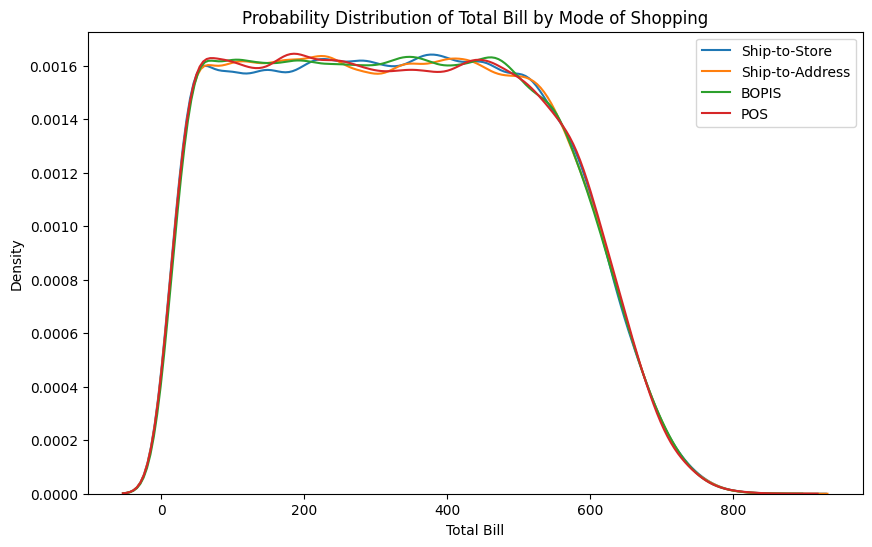

In [8]:
sts = df[df['Mode of Shopping'] == 'Ship-to-Store']
sta = df[df['Mode of Shopping'] == 'Ship-to-Address']
bopis = df[df['Mode of Shopping'] == 'BOPIS']
pos = df[df['Mode of Shopping'] == 'POS']

plt.figure(figsize=(10, 6))
sns.kdeplot(sts['Total Bill'], label='Ship-to-Store', shade=False)
sns.kdeplot(sta['Total Bill'], label='Ship-to-Address', shade=False)
sns.kdeplot(bopis['Total Bill'], label='BOPIS', shade=False)
sns.kdeplot(pos['Total Bill'], label='POS', shade=False)

plt.xlabel('Total Bill')
plt.ylabel('Density')
plt.title('Probability Distribution of Total Bill by Mode of Shopping')
plt.legend()
plt.show()


## HYPOTHESIS TESTING

### To test if there is a significant different between average total bill of Feb 2023 and Dec 2023

In [ ]:
from scipy import stats

feb_2023_data = df[(df['Order Date'].dt.year == 2023) & (df['Order Date'].dt.month == 2)]
dec_2023_data = df[(df['Order Date'].dt.year == 2023) & (df['Order Date'].dt.month == 12)]

feb_2023_total_bill = feb_2023_data['Total Bill']
dec_2023_total_bill = dec_2023_data['Total Bill']

t_statistic, p_value = stats.ttest_ind(feb_2023_total_bill, dec_2023_total_bill, equal_var=True)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average total bill.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average total bill.")


### To test if there is a significant different between average net profit of Bags and Clothes.

In [ ]:
from scipy import stats

clothes_data = df[df['Item Type'].apply(lambda x: 'Clothes' in x)]
bags_data = df[df['Item Type'].apply(lambda x: 'Bags' in x)]

tax_clothes = clothes_data['Net Profit']
tax_bags = bags_data['Net Profit']

t_statistic, p_value = stats.ttest_ind(tax_clothes, tax_bags, equal_var=True)

print(f"P_value is: {p_value}")
alpha = 0.1
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average net profit between bags and clothes")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average net profit between bags and clothes")

### To test significant mean different between Actual cost for FREESHIP and GET50OFF coupon codes

In [ ]:
from scipy import stats

freeship_data = df[df['Coupon Code'] == 'FREESHIP']
get50off_data = df[df['Coupon Code'] == 'GET50OFF']

actual_cost_freeship = freeship_data['Actual Cost']
actual_cost_get50off = get50off_data['Actual Cost']

t_statistic, p_value = stats.ttest_ind(actual_cost_freeship, actual_cost_get50off, equal_var=True)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average actual cost for FREESHIP and GET50OFF coupon codes.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average actual cost for FREESHIP and GET50OFF coupon codes.")


### To test if people with repeat orders have different average total bill than people with single order

In [ ]:
from scipy import stats

df['Order Count'] = df.groupby('Customer ID')['Customer ID'].transform('count')
multiple_orders_data = df[df['Order Count'] > 1]['Total Bill']
single_order_data = df[df['Order Count'] == 1]['Total Bill']

t_statistic, p_value = stats.ttest_ind(multiple_orders_data, single_order_data, equal_var=True)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average total bill.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average total bill.")


### To test if there is a significant different in net profit for Discount20 and Get50Off coupon codes

In [ ]:
in_store_data = df[df['Coupon Code'] == 'DISCOUNT20']['Net Profit']
online_data = df[df['Coupon Code'] == 'GET50OFF']['Net Profit']

print(in_store_data.sum())
print(online_data.sum())

t_statistic, p_value = stats.ttest_ind(in_store_data, online_data, equal_var=True)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average net profit.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average net profit.")

### To test if there is significant difference in average net profit among modes of shopping.

In [ ]:
from scipy.stats import f_oneway

modes = df['Mode of Shopping'].unique()
mode_data = {mode: df[df['Mode of Shopping'] == mode]['Net Profit'] for mode in modes}

f_statistic, p_value = f_oneway(*mode_data.values())

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average net profit among modes of shopping.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average net profit among modes of shopping.")


# **END OF PROJECT**